# Modelos y Simulación – Trabajo Práctico 1 

## Introducción a la Inferencia Estadística 

**Autor: Cátedra – Modelos y Simulación - Facultad de Ingeniería - UCA**     
**Fecha: 2025-08-09**   
**Documento: MS_TP1A_Inferencia_Estadistica_Steel_Frame_R1.ipynb**   
### Temas: Estimación puntual, intervalos de confianza, pruebas de hipótesis (t de Student), errores Tipo I y II, potencia, tamaño muestral.
####  Contexto: en los trabajos prácticos trabajaremos con ejemplos relacionados con la construcción usando acero liviano (steel frame), por ejemplo: datos de perfiles y paneles (espesor, resistencia, recubrimiento, U-value). El objetivo es relacionar la teoría y los trabajos prácticos con temas productivos.

#### Requisitos:
- Ver README.md en reposiorio: https://github.com/UCA-Facultad-de-Ingenieria-Clases-2025/MyS/blob/main/README.md   
- Instalar venv y llamarlo venvmys
- Registrar el kernel en venvmys   
- Usar directorio con el siguiente nombre: ../MyS/
- A continuación indicar paquetes necesarios indicados en requirements.txt

In [3]:
import sys, ipykernel, platform
print("Python:", sys.executable)
print("ipykernel:", ipykernel.__file__)
print("Version:", platform.python_version())


Python: /home/javier/Documents/GitRepo/UCA/MyS/venvmys/bin/python
ipykernel: /home/javier/Documents/GitRepo/UCA/MyS/venvmys/lib/python3.10/site-packages/ipykernel/__init__.py
Version: 3.10.12


### Módulo de utilidades estadísticas para medias - Parte A
- A continuación y a modo de ejemplo se presentan algunas funciones para hacer pruebas de los conceptos visto en la teoría.
- Funciones para pruebas de hipótesis sobre medias (Z y t), intervalos de confianza y potencia aproximada.  


#### Cuantil de la normal: cuantil_normal_inversa(p) - inv_norm_cdf(p)
- Devuelve el cuantil (percentil inverso) de la distribución normal estándar N(0,1).
- La distribución Normal (también llamada “Curva de Gauss”) describe muchos fenómenos naturales e ingenieriles: resistencia de materiales, tolerancias de fabricación, errores de medición, etc. Tiene una forma de campana simétrica, concentrada alrededor de la media.
  - Se caracteriza por dos parámetros:
    - Media (μ): el “centro” o valor esperado.
    - Desviación estándar (σ): mide cuánto se dispersan los datos alrededor de la media.
  - $f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$
- Cuando la Normal tiene media 0 y desviación estándar 1 se llama Normal estándar y se nota como:
  - $Z \sim \mathcal{N}(0,1)$
- Un cuantil es el valor que “corta” el área bajo la curva en una cierta proporción.
  - Ejemplo: el cuantil del 97.5% es el valor z tal que:
  - $P(Z \leq z) = 0.975$
  - z≈1.96. Interpretación: el 97.5% de los valores de una Normal estándar están a la izquierda de 1.96.
- Aplicación del cuantil de la normal:
  - Intervalos de confianza: para estimar un parámetro (ejemplo: resistencia promedio de perfiles de acero) con un rango de confianza. Fórmula con sigma conocida:
    - $\overline{x} \pm z_{1-\alpha/2}\,\frac{\sigma}{\sqrt{n}}$
- Pruebas de hipótesis: para decidir si un resultado experimental está dentro de lo esperado o es “demasiado raro” (rechazo de hipótesis nula).
- Diseño de experimentos y control de calidad:
  - Ejemplo: establecer límites de tolerancia (5% de fallas, 1% de fallas, etc.).   

- cuantil_normal_inversa(p)
  - $z = \Phi^{-1}(p)$
  - Φ(z)) es la función de distribución acumulada de la Normal estándar.
  - Ejemplo:
    - Si p=0.975 → cuantil_normal_inversa(0.975) ≈ 1.96.
    - Si p=0.05 → cuantil_normal_inversa(0.05) ≈ -1.64.
* 
- Coeficientes a, b, c, d
  - El cálculo exacto de la inversa de la Normal no tiene una fórmula cerrada. Por eso, los coeficientes a, b, c, d son constantes numéricas predefinidas que permiten aproximar Φ−1(p) con alta precisión mediante cocientes de polinomios.
  - a y b: se usan en la parte central de la curva (probabilidades alrededor de 0.5).
  - c y d: se usan en las colas (probabilidades cercanas a 0 o 1).

- Son parámetros de una fórmula empírica diseñada para que el resultado sea casi idéntico al real.

- CDF = Cumulative Distribution Function (Función de Distribución Acumulada).
- Si X es una variable aleatoria, la CDF se define como: F(x) = P(X≤x) para un valor x la CDF da la probabilidad acumulada de que la variable aleatoria tome un valor menor o igual a x.

### Ejemplo 1 aplicado a Steel Frame
- Hipótesis: el espesor medio de perfiles es 1.5 mm.
- Muestra: 30 perfiles medidos.
- Usamos cuantil_normal_inversa(p) / inv_norm_cdf(p) para construir un intervalo de confianza y ver si cumplen norma IRAM/CIRSOC.
- Planteo:
  - Una línea de producción de perfiles steel frame exige que el espesor medio sea al menos μ0=0,85 mm
  - A partir de experiencia previa del proceso, asumimos desviación estándar poblacional conocida σ=0,07 mm (caso “z”).
  - Tomamos una muestra de n=30 perfiles y medimos una media muestral x‾=0,872 mm.
  - Queremos:
  - 1. Construir un IC bilateral 95% para μ.
    2. Probar H0:μ=μ0 vs H1:μ>μ0 α=0,05 (unilateral derecha).
  - Intervalo de confianza (σ conocida)
  - $\overline{x} \pm z_{1-\alpha/2}\,\frac{\sigma}{\sqrt{n}}$
  - Con α=0,05, necesitamos z0,975. Eso lo calculamos con cuantil_normal_inversa(p)/inv_norm_cdf(0.975)
  - Prueba de hipótesis (z, unilateral)
  - $H_0:\ \mu = \mu_0 \qquad \text{vs} \qquad H_1:\ \mu > \mu_0$
  - Estadístico
  - $z = \frac{\overline{x} - \mu_0}{\sigma / \sqrt{n}}$
  - Regla de decisión (cola derecha):Rechazamos H0 si z>z1−α. Usaremos cuantil_normal_inversa(p)/inv_norm_cdf(0.95) para obtener z0.95.
  - Cuantil de la normal:
  - $z = \Phi^{-1}(p) \quad \Longleftrightarrow \quad P(Z \le z) = p,\quad Z\sim\mathcal{N}(0,1)$
  - Cálculo de IC y test z unilateral.





In [1]:
%matplotlib inline

=== Prueba z unilateral (cola derecha) ===
x̄ = 0.872, μ₀ = 0.85, σ = 0.07, n = 30, α = 0.05
z observado = 1.721
z crítico   = 1.645
p-valor (una cola) = 0.0426
Decisión: Rechazamos H₀


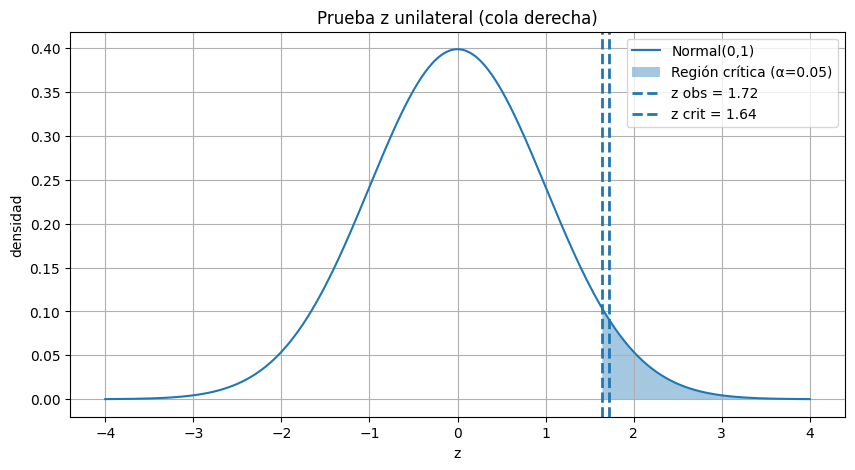

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

def cuantil_normal_inversa(p):
    """Devuelve z tal que P(Z <= z) = p para Z ~ N(0,1)."""
    if p <= 0.0 or p >= 1.0:
        raise ValueError("p debe estar en (0,1)")
    a = [-3.969683028665376e+01,  2.209460984245205e+02,
         -2.759285104469687e+02,  1.383577518672690e+02,
         -3.066479806614716e+01,  2.506628277459239e+00]
    b = [-5.447609879822406e+01,  1.615858368580409e+02,
         -1.556989798598866e+02,  6.680131188771972e+01,
         -1.328068155288572e+01]
    c = [-7.784894002430293e-03, -3.223964580411365e-01,
         -2.400758277161838e+00, -2.549732539343734e+00,
          4.374664141464968e+00,  2.938163982698783e+00]
    d = [ 7.784695709041462e-03,  3.224671290700398e-01,
          2.445134137142996e+00,  3.754408661907416e+00]
    plow  = 0.02425
    phigh = 1 - plow
    if p < plow:
        q = math.sqrt(-2*math.log(p))
        num = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5])
        den = ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
        return num / den
    if phigh < p:
        q = math.sqrt(-2*math.log(1 - p))
        num = (((((c[0]*q + c[1])*q + c[2])*q + c[3])*q + c[4])*q + c[5])
        den = ((((d[0]*q + d[1])*q + d[2])*q + d[3])*q + 1)
        return -(num / den)
    q = p - 0.5
    r = q*q
    a0 = (((((a[0]*r + a[1])*r + a[2])*r + a[3])*r + a[4])*r + a[5])
    b0 = (((((b[0]*r + b[1])*r + b[2])*r + b[3])*r + b[4])*r + 1)
    return (a0 * q) / b0

# --- Parámetros del caso ---
x_bar = 0.872
mu0   = 0.85
sigma = 0.07
n     = 30
alpha = 0.05

# Estadístico observado y crítico
z_obs  = (x_bar - mu0) / (sigma / (n ** 0.5))
z_crit = cuantil_normal_inversa(1 - alpha)

# p-valor unilateral (cola derecha) usando erf (sin SciPy)
Phi = lambda z: 0.5 * (1 + math.erf(z / math.sqrt(2)))
p_valor = 1 - Phi(z_obs)

# --- Impresión de resultados ---
print("=== Prueba z unilateral (cola derecha) ===")
print(f"x̄ = {x_bar}, μ₀ = {mu0}, σ = {sigma}, n = {n}, α = {alpha}")
print(f"z observado = {z_obs:.3f}")
print(f"z crítico   = {z_crit:.3f}")
print(f"p-valor (una cola) = {p_valor:.4f}")
print("Decisión:", "Rechazamos H₀" if z_obs > z_crit else "No se rechaza H₀")

# --- Gráfico ---
x = np.linspace(-4, 4, 600)
y = (1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)

plt.figure(figsize=(10,5))
plt.plot(x, y, label="Normal(0,1)")

# Región crítica (cola derecha)
x_fill = np.linspace(z_crit, 4, 200)
y_fill = (1/np.sqrt(2*np.pi)) * np.exp(-x_fill**2/2)
plt.fill_between(x_fill, y_fill, alpha=0.4, label=f"Región crítica (α={alpha})")

# Líneas
plt.axvline(z_obs,  linestyle="--", linewidth=2, label=f"z obs = {z_obs:.2f}")
plt.axvline(z_crit, linestyle="--", linewidth=2, label=f"z crit = {z_crit:.2f}")

plt.title("Prueba z unilateral (cola derecha)")
plt.xlabel("z"); plt.ylabel("densidad")
plt.legend(); plt.grid(True)
plt.show()


#### Datos del ejemplo
- x_bar = 0.872   # media muestral (mm)
- mu0   = 0.85    # valor nominal (mm)
- sigma = 0.07    # desviación estándar poblacional conocida (mm)
- n     = 30      # tamaño muestral
- alpha = 0.05

#### 1) Intervalo de confianza 95% (bilateral)
- z_975 = cuantil_normal_inversa(1 - alpha/2)  # z_{0.975} ~ 1.96
- margen = z_975 * sigma / (n ** 0.5)
- ic_95 = (x_bar - margen, x_bar + margen)

#### 2) Prueba de hipótesis unilateral (derecha)
- z_obs = (x_bar - mu0) / (sigma / (n ** 0.5))   # estadístico z observado
- z_crit = cuantil_normal_inversa(1 - alpha)     # z_{0.95} ~ 1.645
- ic_95, z_obs, z_crit

Interpretación:

- IC 95% estará completamente por encima de ~0.85 mm si la media muestral es suficientemente grande; eso sugiere cumplimiento.
- Si zobs > zcrit (por ejemplo, ~2.0 > 1.645), se rechaza H0 y se concluye que μ > 0.85 mm con α=0,05.
- Si σ no es conocida, usar t de Student y reemplazar z por t, σ por s (desviación muestral) y los cuantiles se obtienen de la t con n−1 g.l.
- $\overline{x} \pm t_{1-\alpha/2,\ n-1}\,\frac{s}{\sqrt{n}}, \qquad t = \frac{\overline{x}-\mu_0}{s/\sqrt{n
- En SciPy, el equivalente a inv_norm_cdf(p) es scipy.stats.norm.ppf(p).


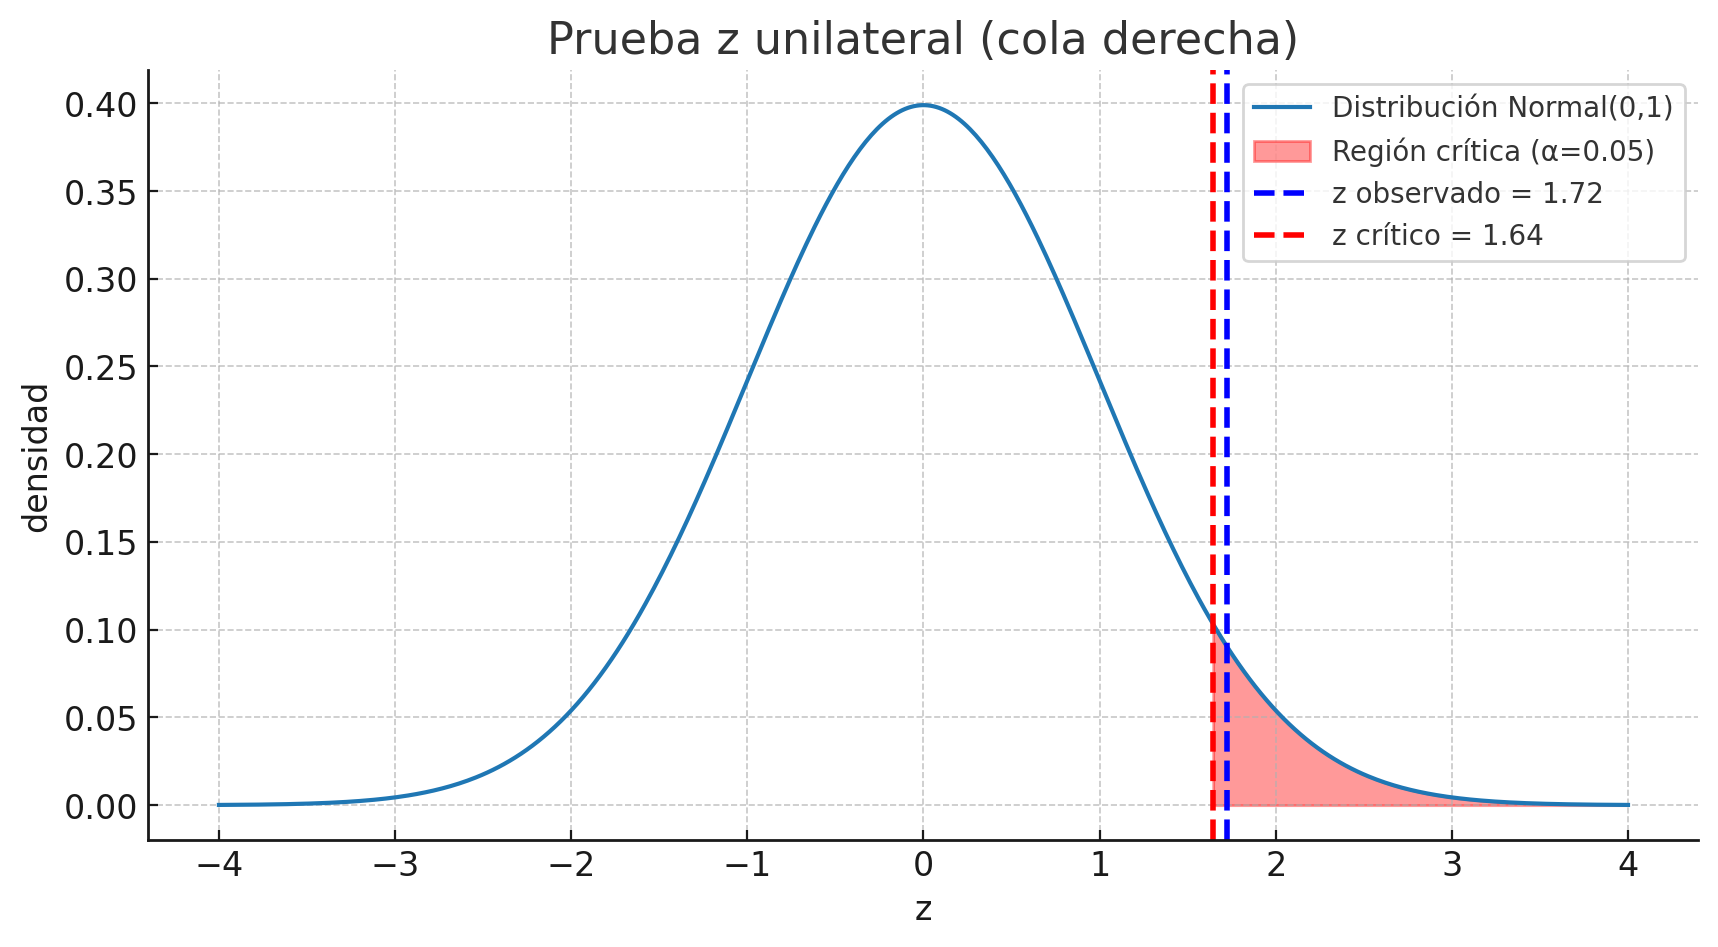

#### Visualización del ejemplo:

- La curva es la distribución normal estándar N(0,1).
- En rojo se marca la región crítica unilateral derecha (α=0.05).
- La línea azul indica el estadístico observado (zobs=1.76).
- La línea roja punteada indica el valor crítico (z0.95≈1.64).
- Si zobs > zcrítico, caemos en la región crítica → rechazamos H0.
- En este caso: zobs=1.76  >  zcrítico=1.64 ⇒ Rechazamos H0 al 5%.
- Estadístico de prueba:
- $Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$
- Valor crítico (cola derecha):
- $z_{1-\alpha} = \Phi^{-1}(1-\alpha)$


### Módulo de utilidades estadísticas para medias - Parte B
- A continuación y a modo de ejemplo se presentan algunas funciones para hacer pruebas de los conceptos visto en la teoría.
- Funciones para pruebas de hipótesis sobre medias (Z y t), intervalos de confianza y potencia aproximada.
- La tabla de def z_crit(alpha_two_sided=0.05) se calcula desde:

from scipy.stats import t
df = 10   # grados de libertad
alpha = 0.05
valor_critico = t.ppf(1 - alpha/2, df)

- El diccionario t_crit_table_95 es una mini-tabla precargada con algunos valores ya calculados para distintos grados de libertad, correspondientes a un intervalo de confianza del 95% (α=0.05, dos colas).

In [6]:
import math, statistics, random
from statistics import mean, stdev

def z_crit(alpha_two_sided=0.05):
    return abs(inv_norm_cdf(1 - alpha_two_sided/2))

t_crit_table_95 = {
    1:12.706, 2:4.303, 3:3.182, 4:2.776, 5:2.571, 6:2.447, 7:2.365, 8:2.306,
    9:2.262, 10:2.228, 11:2.201, 12:2.179, 13:2.160, 14:2.145, 15:2.131,
    16:2.120, 17:2.110, 18:2.101, 19:2.093, 20:2.086, 21:2.080, 22:2.074,
    23:2.069, 24:2.064, 25:2.060, 26:2.056, 27:2.052, 28:2.048, 29:2.045,
    30:2.042, 40:2.021, 60:2.000, 120:1.980
}

def tcrit_approx_two_sided(df, alpha=0.05):
    if df in t_crit_table_95 and abs(alpha-0.05) < 1e-9:
        return t_crit_table_95[df]
    nearest = min(t_crit_table_95.keys(), key=lambda k: abs(k-df))
    if abs(alpha-0.05) < 1e-9:
        return t_crit_table_95[nearest]
    return z_crit(alpha)

def ci_mean_unknown_sigma(xbar, s, n, alpha=0.05):
    df = n-1
    tcrit = tcrit_approx_two_sided(df, alpha)
    half = tcrit * (s / math.sqrt(n))
    return (xbar - half, xbar + half, tcrit)

def t_statistic(xbar, mu0, s, n):
    return (xbar - mu0) / (s / math.sqrt(n))

def approx_power_two_sided(mu0, mu1, s, n, alpha=0.05):
    zc = z_crit(alpha)
    Delta = (mu1 - mu0) / (s / math.sqrt(n))
    from math import erf, sqrt
    def Phi(z):
        return 0.5*(1 + erf(z/math.sqrt(2)))
    power = (1 - Phi(zc - Delta)) + Phi(-zc - Delta)
    return power



#### Valor Crítico Z bilateral: z_crit(alpha_two_sided=0.05)   

Devuelve z1−α/2. Para α=0.05, z0.975≈1.96z  
$z_{\text{crit}} = z_{1-\alpha/2}.$

##### Valor Crítico t aproximado: tcrit_approx_two_sided(df, alpha=0.05)

- Si α=0.05 y los grados de libertad ν=df están en la tabla incluida, devuelve t1−α/2, ν
- Si no está, toma el df más cercano.
- Si α≠0.05, hace fallback a z1−α/2 (aproximación).   
$t_{\text{crit}} \approx t_{1-\alpha/2,\ \nu}
\quad\text{(o bien)}\quad
t_{\text{crit}} \approx z_{1-\alpha/2}\ \text{si no hay tabla para }\alpha$.

##### IC para la media con σ desconocida: ci_mean_unknown_sigma(xbar, s, n, alpha)

Devuelve (LI,LS,tcrit) del intervalo t.

$\text{IC}_{1-\alpha}(\mu):\ \ 
\bar{X} \pm t_{1-\alpha/2,\ n-1}\,\frac{s}{\sqrt{n}},
\qquad
\text{semi-ancho} = t_{1-\alpha/2,\ n-1}\,\frac{s}{\sqrt{n}}$.
##### Estadístico de prueba t: t_statistic(xbar, mu0, s, n)

Calcula el t de Student para contrastar H0:μ=μ0 con σ desconocida.

$t = \frac{\bar{X} - \mu_0}{s/\sqrt{n}}, 
\qquad t \sim t_{n-1}\ \ \text{bajo }H_0$.
##### Potencia aproximada (bilateral, normal): approx_power_two_sided(mu0, mu1, s, n, alpha)

Aproxima la potencia usando normal (no t no-central). Define el tamaño de efecto estandarizado

$\Delta = \frac{\mu_1 - \mu_0}{s/\sqrt{n}}, 
\qquad z_c = z_{1-\alpha/2}$.   
y usa   
$\text{Potencia} \approx 
\big[1-\Phi(z_c - \Delta)\big] + \Phi(-z_c - \Delta)$.

##### Se llama valor crítico porque es el valor del estadístico de prueba (Z, t, χ², F, etc.) que marca la frontera entre la región de aceptación y la región de rechazo de la hipótesis nula.
- Si el estadístico calculado es mayor (en valor absoluto) que el valor crítico, caemos en la región de rechazo → se rechaza H0.
- Si es menor, no se rechaza H0.

### Ejemplo 2 aplicado a Steel Frame
#### Inferencia estadística aplicada a steel frame (perfiles y paneles):    
- Espesores, resistencia, recubrimiento de zinc, U-value, proveedor y lote.

### Fórmulas 

- Media muestral: $(\overline{x}=\frac{1}{n}\sum_{i=1}^n x_i)$
- Varianza muestral: $(s^2=\frac{1}{n-1}\sum_{i=1}^n (x_i-\overline{x})^2)$
- IC para media: $(\overline{x} \pm t_{\alpha/2,\ n-1}\ \frac{s}{\sqrt{n}})$
- t de 1 muestra: $(t=\frac{\overline{x}-\mu_0}{s/\sqrt{n}})$
- t de 2 muestras (var. desiguales): $(t=\frac{\overline{x}_1-\overline{x}_2}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$)

#### Generamos un dataset con:
- id_panel
  - Código identificador del panel.
  - Formato: P<lote>-<número>, por ejemplo: P1005-034.
  - Se construye a partir del número de lote y un entero aleatorio.
- proveedor
  - Proveedor de los perfiles de acero (A o B).
  - Se asigna de forma aleatoria con probabilidad 55% para A y 45% para B.
- lote
  - Número de lote al que pertenece el panel.
  - Enteros entre 1001 y 1011.
- espesor_mm
  - Espesor de los perfiles (en milímetros).
  - Distribución normal:
    - Proveedor A: media = 0.90 mm, σ = 0.06
    - Proveedor B: media = 0.88 mm, σ = 0.07
  - Limitado al rango 0.70 a 1.10 mm.
- resistencia_fluencia_MPa
  - Resistencia a la fluencia del acero (en MPa).
  - Modelo lineal:
    - fluencia=230+80⋅(espesor−0.85)+ε
    - donde ε∼N(0,12).
  - Valores típicos entre 210 y 280 MPa.
- recubrimiento_zinc_g_m2
  - Cantidad de zinc en el recubrimiento (g/m²).
  - Distribución normal:
    - A: media = 220, σ = 18
    - B: media = 210, σ = 20
  - Limitado entre 160 y 280 g/m².
- U_W_m2K
  - Valor de transmitancia térmica U (W/m²·K).
  - Modelo:
    - U=0.35−0.06⋅(espesor−0.85)+ruido+penalización
    - con ruido normal N(0,0.015) y penalización:
      - A: +0.012
      - B: +0.015
  - Limitado entre 0.18 y 0.55 W/m²·K.
- cumple_requisito_U
  - Variable booleana (True/False).
  - Indica si el panel cumple con la condición U≤0.40.

- El dataset simula datos de producción y calidad de perfiles de Steel Frame, incluyendo espesor, resistencia, recubrimiento, desempeño térmico y cumplimiento de normas.
- Esto permite:
  - Hacer análisis estadístico de control de calidad.
  - Comparar proveedores A vs B.
  - Probar hipótesis sobre resistencia y aislamiento térmico.
  - Practicar inferencia con un caso realista.

In [1]:
# Generar dataset de Steel Frame y guardar CSV en el mismo directorio
import numpy as np
import pandas as pd
from pathlib import Path

def generar_dataset_csv(salida_path: Path):
    rng = np.random.default_rng(42)  # Generador aleatorio reproducible
    n = 240  # Cantidad de registros

    # Proveedor
    proveedor = rng.choice(['A', 'B'], size=n, p=[0.55, 0.45])

    # Medias y desviaciones estándar para el espesor según proveedor
    media_A, media_B = 0.90, 0.88
    desv_A, desv_B = 0.06, 0.07

    # Espesor de perfiles (mm)
    espesor = np.where(
        proveedor == 'A',
        rng.normal(media_A, desv_A, size=n),
        rng.normal(media_B, desv_B, size=n)
    )
    espesor = np.clip(espesor, 0.70, 1.10)  # limitar valores

    # Resistencia a la fluencia (MPa)
    resistencia_fluencia = 230 + 80*(espesor - 0.85) + rng.normal(0, 12, size=n)

    # Recubrimiento de zinc (g/m²)
    recubrimiento = np.where(
        proveedor == 'A',
        rng.normal(220, 18, size=n),
        rng.normal(210, 20, size=n)
    )
    recubrimiento = np.clip(recubrimiento, 160, 280)

    # Valor U base y penalización por puente térmico
    U_base = 0.35 - 0.06*(espesor - 0.85) + rng.normal(0, 0.015, size=n)
    penalizacion_puente = np.where(proveedor == 'A', 0.012, 0.015)
    valor_U = np.clip(U_base + penalizacion_puente, 0.18, 0.55)

    # Cumple requisito de U
    cumple_U = (valor_U <= 0.40)

    # Lotes y códigos de panel
    lote = rng.integers(1001, 1012, size=n)
    id_panel = [f"P{b}-{i:03d}" for b, i in zip(lote, rng.integers(1, 160, size=n))]

    # Crear DataFrame
    df = pd.DataFrame({
        "id_panel": id_panel,
        "proveedor": proveedor,
        "lote": lote,
        "espesor_mm": np.round(espesor, 3),
        "resistencia_fluencia_MPa": np.round(resistencia_fluencia, 1),
        "recubrimiento_zinc_g_m2": np.round(recubrimiento, 0),
        "U_W_m2K": np.round(valor_U, 3),
        "cumple_requisito_U": cumple_U
    })

    # Guardar CSV
    df.to_csv(salida_path, index=False)
    return df

if __name__ == "__main__":
    # Directorio del script y ruta del CSV en el mismo directorio
    csv_path = Path("steelframe_inferencia_dataset.csv")  # guarda en la carpeta actual del notebook

    df = generar_dataset_csv(csv_path)
    print(f"CSV generado con {len(df)} registros en: {csv_path}")


CSV generado con 240 registros en: steelframe_inferencia_dataset.csv


### Ejercicio 3.1 — Estimación puntual (espesor mm de perfiles)
- Objetivo: Estimar el espesor promedio de los perfiles (μ espesor) y su variabilidad usando la media muestral.
- Pasos: Calcular x y s de espesor_mm.
- Interpretar resultados (tolerancias del proyecto).
- Usamos la media muestral x‾ como estimador insesgado de μ.
- $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$


In [15]:
import pandas as pd

# Cargar el CSV previamente generado
df = pd.read_csv("steelframe_inferencia_dataset.csv")

# Revisar primeras filas
print(df.head())

# Estadísticas
x = df["espesor_mm"].dropna()
n = x.size
x_mean = x.mean()
x_std = x.std(ddof=1)

print("Estadísticos descriptivos del espesor de perfiles")
print(f"Tamaño muestral (n): {n}")
print(f"Media muestral (x̄): {x_mean:.3f} mm")
print(f"Desvío estándar muestral (s): {x_std:.3f} mm")


    id_panel proveedor  lote  espesor_mm  resistencia_fluencia_MPa  \
0  P1003-023         B  1003       0.923                     233.3   
1  P1009-016         A  1009       0.861                     216.3   
2  P1003-094         B  1003       0.954                     219.6   
3  P1004-001         B  1004       0.800                     234.2   
4  P1003-103         A  1003       0.836                     224.7   

   recubrimiento_zinc_g_m2  U_W_m2K  cumple_requisito_U  
0                    249.0    0.364                True  
1                    245.0    0.360                True  
2                    185.0    0.352                True  
3                    191.0    0.324                True  
4                    220.0    0.344                True  
Estadísticos descriptivos del espesor de perfiles
Tamaño muestral (n): 240
Media muestral (x̄): 0.886 mm
Desvío estándar muestral (s): 0.071 mm


Análisis del espesor de perfiles (mm)
Cantidad de paneles analizados: 240
Media muestral (x̄): 0.886 mm
Desvío estándar muestral (s): 0.071 mm
Distribución de frecuencias graficada en histograma.



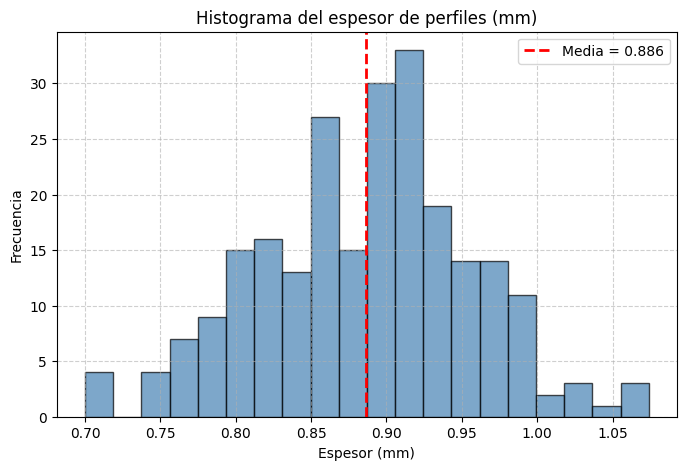

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# Leer CSV
df = pd.read_csv("steelframe_inferencia_dataset.csv")

# Variable de interés: espesor
x = df["espesor_mm"].dropna()
n = x.size
x_mean = x.mean()
x_std = x.std(ddof=1)


print("Análisis del espesor de perfiles (mm)")
print(f"Cantidad de paneles analizados: {n}")
print(f"Media muestral (x̄): {x_mean:.3f} mm")
print(f"Desvío estándar muestral (s): {x_std:.3f} mm")
print("Distribución de frecuencias graficada en histograma.\n")

# === Histograma ===
plt.figure(figsize=(8,5))
plt.hist(x, bins=20, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(x_mean, color="red", linestyle="--", linewidth=2, label=f"Media = {x_mean:.3f}")
plt.title("Histograma del espesor de perfiles (mm)")
plt.xlabel("Espesor (mm)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



### Ejercicio 3.2 — intervalo de confianza (IC) para la media de espesor
- Calcular un rango de valores que, con cierto nivel de confianza (95%), contenga el valor verdadero de 
μ.
- El IC incorpora la variabilidad muestral y la incertidumbre de estimación.
- Con σ desconocida, se usa la distribución t de Student.
- $\overline{x} \pm t_{\alpha/2,\,n-1} \cdot \frac{s}{\sqrt{n}}$


In [17]:
from scipy import stats
import numpy as np

# Nivel de significancia
alpha = 0.05

# Valor crítico t para 95% de confianza (bilateral)
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# Margen de error (MOE)
moe = t_crit * x_std/np.sqrt(n)

# Intervalo de confianza
ci_lower, ci_upper = (x_mean - moe, x_mean + moe)

# === Impresión descriptiva ===
print("Intervalo de confianza para el espesor medio (95%)")
print(f"Cantidad de observaciones (n): {n}")
print(f"Media muestral (x̄): {x_mean:.3f} mm")
print(f"Desvío estándar muestral (s): {x_std:.3f} mm")
print(f"Valor crítico t (gl={n-1}, α={alpha}): {t_crit:.3f}")
print(f"Margen de error (MOE): ±{moe:.3f} mm")
print(f"Intervalo de confianza al 95%: ({ci_lower:.3f}, {ci_upper:.3f}) mm")


Intervalo de confianza para el espesor medio (95%)
Cantidad de observaciones (n): 240
Media muestral (x̄): 0.886 mm
Desvío estándar muestral (s): 0.071 mm
Valor crítico t (gl=239, α=0.05): 1.970
Margen de error (MOE): ±0.009 mm
Intervalo de confianza al 95%: (0.877, 0.895) mm


### Ejercicio 3.3 — Prueba t de 1 muestra - Espesor nominal
- Verificar si el espesor medio difiere (o es mayor) que un valor nominal μ0.
- Hipótesis nula H0:μ=μ0
- Hipótesis alternativa H1:μ>μ0
- Se calcula un estadístico t y se compara con un valor crítico o p-valor.
- $t = \frac{\overline{x} - \mu_0}{s / \sqrt{n}}$
- Test de hipótesis unilateral para el espesor medio.
    - Compara la media muestral con un valor de referencia μ0=0.85 mm, verificando si la media es significativamente mayor.

In [19]:
from scipy import stats

# Hipótesis
mu0 = 0.85  # valor de referencia

# Test t unilateral (H1: μ > μ0)
t_stat, p_one_sided = stats.ttest_1samp(x, popmean=mu0, alternative="greater")

print("Test t de una muestra (H1: μ > μ0)")
print(f"Cantidad de observaciones (n): {n}")
print(f"Media muestral (x̄): {x_mean:.3f} mm")
print(f"Desvío estándar muestral (s): {x_std:.3f} mm")
print(f"Hipótesis nula (H0): μ = {mu0} mm")
print(f"Hipótesis alternativa (H1): μ > {mu0} mm")
print(f"Estadístico t calculado: {t_stat:.3f}")
print(f"p-valor (unilateral): {p_one_sided:.5f}")

# Decisión
alpha = 0.05
if p_one_sided < alpha:
    print(f">>> Se RECHAZA H0 al nivel α={alpha}.")
    print("   Evidencia estadística suficiente de que μ > 0.85 mm.")
else:
    print(f">>> No se puede rechazar H0 al nivel α={alpha}.")
    print("   No hay evidencia estadística suficiente de que μ > 0.85 mm.")


Test t de una muestra (H1: μ > μ0)
Cantidad de observaciones (n): 240
Media muestral (x̄): 0.886 mm
Desvío estándar muestral (s): 0.071 mm
Hipótesis nula (H0): μ = 0.85 mm
Hipótesis alternativa (H1): μ > 0.85 mm
Estadístico t calculado: 7.933
p-valor (unilateral): 0.00000
>>> Se RECHAZA H0 al nivel α=0.05.
   Evidencia estadística suficiente de que μ > 0.85 mm.


### Ejercicio 2.4 — Prueba t de 2 muestras (espesor A vs B)
- Determinar si el espesor promedio de perfiles del proveedor A es mayor que el del proveedor B.
- Hipótesis nula H0:μA=μB
- Hipótesis alternativa H1:μA>μB
- Se usa t para muestras independientes con varianzas desiguales.
- $t = \frac{\overline{x}_A - \overline{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}$
- test t para muestras independientes comparando el espesor promedio de los perfiles fabricados por los proveedores A y B, con la hipótesis alternativa de que el espesor de A es mayor que el de B.


In [20]:
# Comparación de espesor entre proveedores
espesor_A = df.loc[df["proveedor"]=="A", "espesor_mm"]
espesor_B = df.loc[df["proveedor"]=="B", "espesor_mm"]

# Test t de Student con varianzas desiguales (Welch)
resultado_t = stats.ttest_ind(espesor_A, espesor_B, equal_var=False, alternative="greater")


print("Test t para muestras independientes (Welch)")
print(f"Cantidad de paneles proveedor A: {len(espesor_A)}")
print(f"Cantidad de paneles proveedor B: {len(espesor_B)}")
print(f"Media A (x̄A): {espesor_A.mean():.3f} mm")
print(f"Media B (x̄B): {espesor_B.mean():.3f} mm")
print(f"Desvío estándar A (sA): {espesor_A.std(ddof=1):.3f} mm")
print(f"Desvío estándar B (sB): {espesor_B.std(ddof=1):.3f} mm")
print("\nHipótesis:")
print("  H0: μA = μB")
print("  H1: μA > μB")
print(f"\nEstadístico t calculado: {resultado_t.statistic:.3f}")
print(f"p-valor (unilateral): {resultado_t.pvalue:.5f}")

alpha = 0.05
if resultado_t.pvalue < alpha:
    print(f">>> Se RECHAZA H0 al nivel α={alpha}.")
    print("   Evidencia estadística suficiente de que el espesor promedio del proveedor A es mayor que el de B.")
else:
    print(f">>> No se puede rechazar H0 al nivel α={alpha}.")
    print("   No hay evidencia estadística suficiente para afirmar que el proveedor A tiene mayor espesor promedio que B.")


Test t para muestras independientes (Welch)
Cantidad de paneles proveedor A: 129
Cantidad de paneles proveedor B: 111
Media A (x̄A): 0.896 mm
Media B (x̄B): 0.874 mm
Desvío estándar A (sA): 0.064 mm
Desvío estándar B (sB): 0.076 mm

Hipótesis:
  H0: μA = μB
  H1: μA > μB

Estadístico t calculado: 2.394
p-valor (unilateral): 0.00877
>>> Se RECHAZA H0 al nivel α=0.05.
   Evidencia estadística suficiente de que el espesor promedio del proveedor A es mayor que el de B.


### Ejercicio 2.5 — Intervalo y prueba para el U-value
- Calcular el IC de la media de U (transmitancia térmica).
- Verificar si es menor o igual al valor límite normativo (0.40 W/m²K).
- U bajo indica mejor aislamiento.
- Comparación con valor objetivo usando t de 1 muestra (cola izquierda).
- $IC: \quad \overline{U} \pm t_{\alpha/2,\,n-1} \cdot \frac{s_U}{\sqrt{n}}$
- $t = \frac{\overline{U} - U_0}{s_U / \sqrt{n}}$
- Evaluar el valor U (transmitancia térmica) de los paneles:
    - 1. Se construye un intervalo de confianza al 95% 
    - 2. Se realiza un test t para contrastar la hipótesis de que la media poblacional es menor que 0.40 W/m²K.
- Cohen's d complementa el test t.
    - Mientras el test t dice si la diferencia es estadísticamente significativa, Cohens'd indica si la diferencia es prácticamente relevante (tamaño del efecto).


In [21]:
# Función para calcular Cohen's d 
def d_cohen(a, b):
    var_a, var_b = a.var(ddof=1), b.var(ddof=1)
    desv_pooled = np.sqrt(((a.size-1)*var_a + (b.size-1)*var_b) / (a.size+b.size-2))
    return (a.mean() - b.mean()) / desv_pooled

# Calcular Cohen's d
d_value = d_cohen(espesor_A, espesor_B)

print("Tamaño del efecto: Cohen's d")
print(f"Media A (x̄A): {espesor_A.mean():.3f} mm")
print(f"Media B (x̄B): {espesor_B.mean():.3f} mm")
print(f"Diferencia de medias: {espesor_A.mean()-espesor_B.mean():.3f} mm")
print(f"Cohen's d: {d_value:.3f}")

# Interpretación según reglas de Cohen
if abs(d_value) < 0.2:
    interpretacion = "efecto muy pequeño (prácticamente nulo)"
elif abs(d_value) < 0.5:
    interpretacion = "efecto pequeño"
elif abs(d_value) < 0.8:
    interpretacion = "efecto mediano"
else:
    interpretacion = "efecto grande"

print(f"Interpretación: {interpretacion}")


Tamaño del efecto: Cohen's d
Media A (x̄A): 0.896 mm
Media B (x̄B): 0.874 mm
Diferencia de medias: 0.022 mm
Cohen's d: 0.314
Interpretación: efecto pequeño


In [25]:
# Estadísticos básicos
U = df["U_W_m2K"]
n_U = U.size
media_U = U.mean()
desv_U = U.std(ddof=1)

# Intervalo de confianza (95%)
t_critico_U = stats.t.ppf(0.975, df=n_U-1)
ic_U = (
    media_U - t_critico_U * desv_U / np.sqrt(n_U),
    media_U + t_critico_U * desv_U / np.sqrt(n_U)
)

# Test t unilateral: H0: μ = 0.40 vs H1: μ < 0.40
estad_t_U, p_valor_izquierda = stats.ttest_1samp(U, popmean=0.40, alternative="less")


print("Análisis del valor U (W/m²K)")
print(f"Cantidad de paneles analizados: {n_U}")
print(f"Media muestral: {media_U:.3f} W/m²K")
print(f"Desvío estándar: {desv_U:.3f} W/m²K")
print(f"Intervalo de confianza 95%: ({ic_U[0]:.3f}, {ic_U[1]:.3f}) W/m²K")
print(f"Estadístico t: {estad_t_U:.3f}")
print(f"p-valor (una cola, H1: μ < 0.40): {p_valor_izquierda:.5f}")

# Interpretación automática
alpha = 0.05
if p_valor_izquierda < alpha:
    print("Conclusión: Se rechaza H0 → la media de U es significativamente menor a 0.40 W/m²K.")
else:
    print("Conclusión: No se puede rechazar H0 → no hay evidencia suficiente de que la media sea menor a 0.40.")


Análisis del valor U (W/m²K)
Cantidad de paneles analizados: 240
Media muestral: 0.360 W/m²K
Desvío estándar: 0.016 W/m²K
Intervalo de confianza 95%: (0.358, 0.362) W/m²K
Estadístico t: -38.211
p-valor (una cola, H1: μ < 0.40): 0.00000
Conclusión: Se rechaza H0 → la media de U es significativamente menor a 0.40 W/m²K.


### Ejercicio 2.6 — Comparar U entre proveedor A y B
- Evaluar si los paneles de A tienen menor U (mejor aislamiento) que los de B.
- Hipótesis similar a la del espesor pero buscando diferencia negativa.
- $t = \frac{\overline{U}_A - \overline{U}_B}{\sqrt{\frac{s_{U,A}^2}{n_A} + \frac{s_{U,B}^2}{n_B}}}$
- Valores U (transmitancia térmica) entre los paneles de los dos proveedores, con un test t para muestras independientes.
- La hipótesis que evalúa es:
    - H₀: μₐ = μ_b (las medias de U son iguales)
    - H₁: μₐ < μ_b (el proveedor A tiene un valor U significativamente menor que el de B, o sea mejor aislante)


In [26]:
# Subconjuntos por proveedor
U_A = df.loc[df["proveedor"]=="A", "U_W_m2K"]
U_B = df.loc[df["proveedor"]=="B", "U_W_m2K"]

# Test t de Welch (varianzas no iguales)
resultado = stats.ttest_ind(U_A, U_B, equal_var=False, alternative="less")


print("Comparación de valor U entre proveedores (A vs B)")
print(f"Paneles proveedor A: {U_A.size}, Media = {U_A.mean():.3f}, s = {U_A.std(ddof=1):.3f}")
print(f"Paneles proveedor B: {U_B.size}, Media = {U_B.mean():.3f}, s = {U_B.std(ddof=1):.3f}")
print(f"Estadístico t: {resultado.statistic:.3f}")
print(f"p-valor (H1: μA < μB): {resultado.pvalue:.5f}")

# Interpretación automática
alpha = 0.05
if resultado.pvalue < alpha:
    print("Conclusión: Se rechaza H0 → El proveedor A tiene un valor U significativamente menor (mejor aislante).")
else:
    print("Conclusión: No se puede rechazar H0 → No hay evidencia de que A tenga un valor U menor que B.")


Comparación de valor U entre proveedores (A vs B)
Paneles proveedor A: 129, Media = 0.357, s = 0.016
Paneles proveedor B: 111, Media = 0.362, s = 0.016
Estadístico t: -2.294
p-valor (H1: μA < μB): 0.01135
Conclusión: Se rechaza H0 → El proveedor A tiene un valor U significativamente menor (mejor aislante).


### Ejercicio 2.7 — Simulación de errores Tipo I y II
- Estimar el riesgo de rechazar H0 siendo verdadera (Tipo I).
- Estimar el riesgo de no rechazar H0 siendo falsa (Tipo II) y la potencia 1−β.
- Error Tipo I: α=P(rechazar H0∣H0 verdadera)
- Error Tipo II: β=P(no rechazar H0∣H0 falsa)
- Potencia: 1−β
- $\alpha = P(\text{rechazar } H_0 | H_0 \ \text{verdadera})$
- $\beta = P(\text{no rechazar } H_0 | H_0 \ \text{falsa})$
- $\text{Potencia} = 1 - \beta$


In [27]:
# Subconjuntos por proveedor
U_A = df.loc[df["proveedor"]=="A", "U_W_m2K"]
U_B = df.loc[df["proveedor"]=="B", "U_W_m2K"]

# Test t de Welch (varianzas no iguales)
resultado = stats.ttest_ind(U_A, U_B, equal_var=False, alternative="less")

print("\nComparación de valor U entre proveedores (A vs B)")
print(f"- Paneles proveedor A: {U_A.size}")
print(f"    Media = {U_A.mean():.3f},  Desvío estándar = {U_A.std(ddof=1):.3f}")
print(f"- Paneles proveedor B: {U_B.size}")
print(f"    Media = {U_B.mean():.3f},  Desvío estándar = {U_B.std(ddof=1):.3f}")

print("\n Resultado del test t (Welch, una cola)")
print(f"Estadístico t = {resultado.statistic:.3f}")
print(f"p-valor (H₁: μA < μB) = {resultado.pvalue:.5f}")

# Interpretación automática
alpha = 0.05
print("\nConclusión estadística")
if resultado.pvalue < alpha:
    print(f"Se RECHAZA H₀ al nivel α={alpha}.")
    print("→ Evidencia estadística de que el proveedor A tiene un valor U menor (mejor aislante).")
else:
    print(f"No se puede rechazar H₀ al nivel α={alpha}.")
    print("→ No hay evidencia suficiente para afirmar que A tenga un valor U menor que B.")



Comparación de valor U entre proveedores (A vs B)
- Paneles proveedor A: 129
    Media = 0.357,  Desvío estándar = 0.016
- Paneles proveedor B: 111
    Media = 0.362,  Desvío estándar = 0.016

 Resultado del test t (Welch, una cola)
Estadístico t = -2.294
p-valor (H₁: μA < μB) = 0.01135

Conclusión estadística
Se RECHAZA H₀ al nivel α=0.05.
→ Evidencia estadística de que el proveedor A tiene un valor U menor (mejor aislante).


### Ejercicio 2.8 — Cálculo del tamaño muestral
- Determinar n necesario para detectar una diferencia Δ  con potencia y α dadas.
- Basado en aproximación normal a la t.
- Relaciona tamaño de efecto, variabilidad y error tolerado.
- $n \approx \left( \frac{z_{1-\alpha} + z_{1-\beta}}{\Delta / \sigma} \right)^2$


In [30]:
from scipy.stats import norm
import numpy as np

# Parámetros
sigma = 0.07                # Desvío estándar poblacional (mm)
alfa = 0.05                 # Nivel de significancia (α)
potencia_deseada = 0.80     # Potencia estadística (1-β)
diferencia = 0.03           # Diferencia mínima a detectar (Δ)

# Cálculos intermedios 
z_alfa = norm.ppf(1 - alfa)                 # valor crítico para cola derecha
z_beta = norm.ppf(potencia_deseada)         # valor asociado a potencia deseada

n_necesario = ((z_alfa + z_beta) * sigma / diferencia) ** 2
n_final = int(np.ceil(n_necesario))         # redondeo hacia arriba


print("\nCálculo de tamaño muestral necesario")
print(f"Desvío estándar asumido (σ): {sigma:.3f}")
print(f"Nivel de significancia (α): {alfa:.2f}")
print(f"Potencia deseada (1-β): {potencia_deseada:.2f}")
print(f"Diferencia mínima detectable (Δ): {diferencia:.3f} mm")
print(f"Valor crítico Zα: {z_alfa:.3f}")
print(f"Valor crítico Zβ (para potencia): {z_beta:.3f}")
print(f"Tamaño muestral requerido (n): {n_final} paneles\n")

if n_final < 30:
    print("ATENCION ! El tamaño calculado es relativamente bajo. Verificar supuestos de normalidad.")
else:
    print(">>> Tamaño muestral adecuado para aplicar inferencia con el Teorema Central del Límite.")



Cálculo de tamaño muestral necesario
Desvío estándar asumido (σ): 0.070
Nivel de significancia (α): 0.05
Potencia deseada (1-β): 0.80
Diferencia mínima detectable (Δ): 0.030 mm
Valor crítico Zα: 1.645
Valor crítico Zβ (para potencia): 0.842
Tamaño muestral requerido (n): 34 paneles

>>> Tamaño muestral adecuado para aplicar inferencia con el Teorema Central del Límite.


### Ejercicio 2.9 — Control de calidad por lotes
- Calcular IC de espesor por lote y marcar los que no cumplen tolerancia mínima.
- IC por subgrupos.
- Decisión binaria basada en límite inferior.
- $IC_{lote} = \overline{x}_{lote} \pm t_{\alpha/2,\,n_{lote}-1} \cdot \frac{s_{lote}}{\sqrt{n_{lote}}}$
- Identificar eué lotes tienen intervalos de confianza cuyo límite inferior cae por debajo de 0.82 mm → pueden contener perfiles más delgados de lo aceptable.


In [31]:
import numpy as np
from scipy import stats

alfa = 0.05

# Agregado por lote 
res = (df
       .groupby("lote", as_index=False)
       .agg(n=("espesor_mm", "size"),
            media=("espesor_mm", "mean"),
            desv=("espesor_mm", "std"))
      )

# t crítico para cada grupo (n=1 → NaN porque no hay IC posible)
res["t_crit"] = stats.t.ppf(1 - alfa/2, df=res["n"] - 1)

# Margen de error
res["margen"] = res["t_crit"] * res["desv"] / np.sqrt(res["n"])

# Intervalos de confianza por lote
res["ic_inferior"] = res["media"] - res["margen"]
res["ic_superior"] = res["media"] + res["margen"]

# Bandera de cumplimiento: si el límite inferior < 0.82 → "no cumple"
res["no_cumple"] = res["ic_inferior"] < 0.82

# Ordenamos para ver primero los problemáticos
resultado_lotes = res.sort_values(["no_cumple", "ic_inferior"], ascending=[False, True])

# === Impresión descriptiva ===
print("\nEvaluación de espesores por lote")
print(f"Nivel de confianza: {100*(1-alfa):.1f}%")
print(f"Umbral mínimo aceptable (espesor): 0.82 mm\n")

print("Lotes con mayor riesgo de incumplimiento (primeros 10):")
for _, row in resultado_lotes.head(10).iterrows():
    estado = "ATENCION ! No cumple" if row["no_cumple"] else "APROBADO Cumple"
    print(f"Lote {int(row['lote'])}: "
          f"n={int(row['n'])}, "
          f"media={row['media']:.3f}, "
          f"IC=({row['ic_inferior']:.3f}, {row['ic_superior']:.3f}) → {estado}")



Evaluación de espesores por lote
Nivel de confianza: 95.0%
Umbral mínimo aceptable (espesor): 0.82 mm

Lotes con mayor riesgo de incumplimiento (primeros 10):
Lote 1005: n=24, media=0.851, IC=(0.818, 0.884) → ATENCION ! No cumple
Lote 1010: n=21, media=0.882, IC=(0.844, 0.920) → APROBADO Cumple
Lote 1011: n=24, media=0.883, IC=(0.846, 0.921) → APROBADO Cumple
Lote 1006: n=23, media=0.869, IC=(0.847, 0.891) → APROBADO Cumple
Lote 1008: n=19, media=0.884, IC=(0.848, 0.919) → APROBADO Cumple
Lote 1002: n=18, media=0.890, IC=(0.856, 0.924) → APROBADO Cumple
Lote 1001: n=24, media=0.885, IC=(0.860, 0.909) → APROBADO Cumple
Lote 1004: n=22, media=0.890, IC=(0.862, 0.918) → APROBADO Cumple
Lote 1009: n=23, media=0.899, IC=(0.870, 0.929) → APROBADO Cumple
Lote 1007: n=21, media=0.912, IC=(0.880, 0.944) → APROBADO Cumple


In [ ]:
- Otra forma de presentar los resultados

In [42]:
import numpy as np
from scipy import stats

alfa = 0.05

# Agregamos por lote
res = (df
       .groupby("lote", as_index=False)
       .agg(n=("espesor_mm", "size"),
            media=("espesor_mm", "mean"),
            desv=("espesor_mm", "std"))
      )

# t crítico por grupo (vectorizado); para n=1 la t no está definida -> ponemos NaN
tcrit = stats.t.ppf(1 - alfa/2, df=res["n"] - 1)

# Márgen de error
margen = tcrit * res["desv"] / np.sqrt(res["n"])

# Columnas con IC (maneja NaN si n<2)
res["ic_inferior"] = res["media"] - margen
res["ic_superior"] = res["media"] + margen

# Bandera de no cumplimiento (ajusta el umbral si quieres)
res["no_cumple"] = res["ic_inferior"] < 0.82

# Ordenar para ver primero los que no cumplen
resultado_lotes = res.sort_values(["no_cumple", "ic_inferior"], ascending=[False, True])
resultado_lotes.head(10)


,lote,n,media,desv,ic_inferior,ic_superior,no_cumple
4,1005,24,0.850917,0.077508,0.818188,0.883646,True
9,1010,21,0.881762,0.083131,0.843921,0.919602,False
10,1011,24,0.883250,0.089067,0.845640,0.920860,False
5,1006,23,0.869000,0.051435,0.846758,0.891242,False
7,1008,19,0.883579,0.074509,0.847667,0.919491,False
1,1002,18,0.889667,0.068183,0.855760,0.923573,False
0,1001,24,0.884667,0.058123,0.860124,0.909210,False
3,1004,22,0.890364,0.062975,0.862442,0.918285,False
8,1009,23,0.899478,0.067497,0.870290,0.928666,False
6,1007,21,0.912000,0.069811,0.880222,0.943778,False


#### Ejercicio 10 — Informe breve

- Media e IC del espesor.
- Resultado y significado de la prueba t vs nominal.
- Comparación A vs B en espesor y U.
- Riesgos de errores Tipo I y II.
- Recomendaciones para control de calidad.

### Ejemplo 3 aplicado a Steel Frame
### Ejercicio: Análisis de Calidad en Paneles de Steel Frame

- Se tiene un dataset con 200 paneles de Steel Frame fabricados por dos proveedores (A y B).
    - Usar el mismo código de dataset anterior (el de 240 paneles) y ajustar el parámetro n = 200.
    - El resto de las fórmulas (espesor, resistencia, recubrimiento, valor U, etc.) se mantienen iguales.
    - Esto garantiza que los paneles tengan variabilidad realista, pero cambia el tamaño muestral.
- Las variables medidas son:
    - espesor_mm: espesor del perfil (mm)
    - resistencia_fluencia_MPa: resistencia a la fluencia del acero (MPa)
    - recubrimiento_zinc_g_m2: cantidad de zinc en el recubrimiento (g/m²)
    - U_W_m2K: valor de transmitancia térmica
    - cumple_requisito_U: indicador (True/False) de si el panel cumple con la norma U≤0.40


#### 3.1. Estadística descriptiva
- Calcular la media, mediana y desviación estándar del espesor de los perfiles. 
    - ¿Los proveedores producen espesores consistentes o hay mucha dispersión?

#### 3.2. Prueba de hipótesis para resistencia
- La ingeniería sostiene que la resistencia media de los perfiles debe ser al menos 240 MPa.
    - Plantee la hipótesis nula y alternativa.
    - Realice una prueba t de una muestra con un nivel de significancia α=0.05.
    - Indicar si los perfiles cumplen con el requisito.

#### 3.3. Comparación entre proveedores
- Verificar si el espesor medio difiere significativamente entre proveedores A y B.
- Usar una prueba t para dos muestras independientes (varianzas iguales o no, justificar).
- Indicar el valor p y la conclusión.

#### 3.4. Proporciones de cumplimiento
- De los paneles fabricados:
    - Calcular la proporción de paneles que cumplen con el requisito de transmitancia térmica U≤0.40 en cada proveedor.
    - Realizar una prueba de diferencia de proporciones para ver si la tasa de cumplimiento es distinta entre A y B.

#### 3.5. Modelo predictivo
- Construir una regresión lineal simple donde la variable dependiente sea la resistencia a la fluencia y la independiente sea el espesor.
- Escribir la ecuación estimada.
- Interpretar los coeficientes: ¿a mayor espesor, cómo cambia la resistencia? Evalar el R2.